In [1]:
# In zero-field NMR, the system is dominated by indirect spin-spin (J-coupling) interactions due to a vanishing 
# Zeeman interaction in the absence of an applied magnetic field and averaged out direct spin−spin couplings occurring 
# in isotropic liquids. In this project, I used Python to demonstrate each manifold (state), energy levels, 
# energy level diagrams, and observable transitions for XAn and XAnBm spin systems in zero-field NMR. 
# The context of the project and all examples are originated from the following reference paper.

# S. Alcicek, P. Put, V. Kontul, and S. Pustelny, “Zero-Field NMR J -Spectroscopy of Organophosphorus Compounds,” 
# J. Phys. Chem. Lett., vol. 12, no. 2, pp. 787–792, Jan. 2021, doi: 10.1021/acs.jpclett.0c03532.

In [1]:
# XAn nuclear spin system composed of a heteronucleus X and a set of n magnetically equivalent nuclei A, can be described 
# using three quantum number (S, IA, F). 
# S corresponds to spin X. 
# IA denotes the total spin of all A nuclei.
# F(total spin) ranges from |IA – S|, |IA – S| + 1, ..., IA + S – 1, IA + S.
# Energy levels of states can be calculated using J-coupling constant of X and A nuclei (JXA).
# Observable transitions between states are determined using selection rules. 
# For XAn spin system selective rules are : ΔIA = 0 and ΔF = 0,±1

#The following libraries were used to implement the project. 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

#First, we define our class with XAn spin system properties.
class XAn:
    
    def __init__(self, X,A,n,JXA): 

        self.X = X
        self.A= A
        self.n= n
        self.JXA= JXA
    
    def states(self): #All quantum number must be determined for each state according to explanation above.  
    
        I = []
    
        if self.A*self.n % 1 == 0:
        
            for i in range(-1, int(self.A*self.n), 1):
                i = i+1
                I.append(i)

        else:

            for i in range(-1, int(self.A*self.n*2), 2):
                i = i+2
                I.append(float(i*0.5))

        F= []
        IA=[]

        for k in I:
             for i in range(int(abs(k-self.X)*2-2), int((k+self.X)*2),2):
                i= i+2
                if i >= 0:
                    F.append(i*0.5)
                    IA.append(k)

        S= [] 

        while len(S) < len(F):
            S.append(self.X)
            
            
            
        #We can create a dataset consists of quantum numbers of each state.
        quantum_nums = {
        'IA' : IA,
        'S' : S,
        'F' : F,

    }

        df = pd.DataFrame(quantum_nums)
        
        
        
        #Using the equation from references, we can calculate energy levels of each state. 
        df['E(JXA)']= (df['F']*(df['F']+1)-df['IA']*(df['IA']+1)-df['S']*(df['S']+1))/2
        
        df['E(Hz)'] = df['E(JXA)']*self.JXA
        
        
        
        #We can create a file that consists of datasets. 
        df.to_csv(
    
            'XAn_table_of_energy_levels.tsv',
            index = None,
            sep   = '\t'
        )
        
        
        return df #We can obtain quantum numbers and energy levels of each state as dataset. 
    
    def energy_diagram(self): # We can use necessary data from previous function.
        
        x = Quantum_IA = self.states()['IA']
        y = Energies = self.states()['E(JXA)']
        Quantum_F= self.states()['F']
                            
        # Using matplotlib.pyplot, we can create a energy level diagram which is grouped by IA and specified by F quantum number.

        fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
        ax.scatter(x,y, s=1444, marker="_", linewidth=2, zorder=3, color = 'orange')

        for xi,yi,tx in zip(x,Energies,Quantum_F):
            ax.annotate(tx, xy=(xi,yi), xytext=(0,0), size=10,
                        ha="center", va="center", textcoords="offset points")
            
        ax.set_title('Energy level diagram for XAn spin system')
        ax.set_xlabel('IA')
        ax.set_ylabel('Energy level (JXA)')
        ax.margins(0.1)
        
        #We can save the diagram as a png file.
        fig.savefig('Energy level diagram for XAn spin system', dpi=300, transparent=False)
        plt.show()

    def observable_transitions(self):
        
        # We can use necessary data from first function.
        data2= {
            
            'IA' : self.states()['IA'],
            'F' : self.states()['F'],
            'E(JXA)' : self.states()['E(JXA)'],
            'E(Hz)' : self.states()['E(Hz)']
            
        }
        
        #We can determine dataset with necessary data for this function. 
        df2 = pd.DataFrame(data2)
        
        Delta_F=[] # This list is created to specify F quantum numbers of states with observable transitions. 
        Transition_E=[] # This list is created to specify the energy level of observable transitions in JAX. 
        Transition_EL=[] # This list is created to specify the energy level of observable transitions in Hz. 
        
        # Observable transitions are determined via selection rules. 
        for i in range(-1, len(df2)):
            for n in range(0, len(df2)-1):
                if i>n and df2.iloc[i,0] == df2.iloc[n,0] and np.abs(df2.iloc[i,1]-df2.iloc[n,1]) <= 1:
                    a= str(df2.iloc[n,1])+'-->'+ str(df2.iloc[i,1])
                    Delta_F.append(a)
                    b= np.abs(df2.iloc[n,2]-df2.iloc[i,2])
                    Transition_E.append(b)
                    c= np.abs(df2.iloc[n,3]-df2.iloc[i,3])
                    Transition_EL.append(c)
                    
        # New dataset is formed with related information with observable transitions.
        data3= {
            
            '\u0394F' : Delta_F,
            '\u0394E(JAX)' : Transition_E,
            '\u0394E(Hz)' : Transition_EL
            
        }
        
        df3 = pd.DataFrame(data3)
        
        #We can create a file that consists of this dataset.
        df3.to_csv(
    
            'XAn_table_of_observable_transitions.tsv',
            index = None,
            sep   = '\t'
        )
        
        
        return df3 #We can obtain information of each observable transition as dataset. 
        
        

In [2]:
XAn(0.5,0.5,3,222).states() #XAn(S,IA,n,JXA).states() to see every state of an example spin system.
                           #The example spin system was taken from reference.

,IA,S,F,E(JXA),E(Hz)
0,0.5,0.5,0.0,-0.75,-166.5
1,0.5,0.5,1.0,0.25,55.5
2,1.5,0.5,1.0,-1.25,-277.5
3,1.5,0.5,2.0,0.75,166.5


In [3]:
# We can also read the file that consists of data about the example spin system. 
df = pd.read_csv("XAn_table_of_energy_levels.tsv", index_col=None, header=0, sep='\t') 
df

,IA,S,F,E(JXA),E(Hz)
0,0.5,0.5,0.0,-0.75,-166.5
1,0.5,0.5,1.0,0.25,55.5
2,1.5,0.5,1.0,-1.25,-277.5
3,1.5,0.5,2.0,0.75,166.5


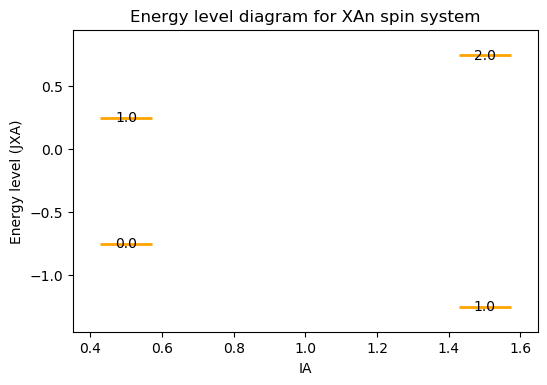

In [5]:
# We can create energy level diagram for the example spin system. 
XAn(0.5,0.5,3,222).energy_diagram()

In [6]:
# We can check the observable transitions for the example spin system. 
XAn(0.5,0.5,9,11).observable_transitions() #XAn(S,IA,n,JXA).observable_transitions()

,ΔF,ΔE(JAX),ΔE(Hz)
0,0.0-->1.0,1.0,11.0
1,1.0-->2.0,2.0,22.0
2,2.0-->3.0,3.0,33.0
3,3.0-->4.0,4.0,44.0
4,4.0-->5.0,5.0,55.0


In [7]:
# We can also read the file that consists of data about observable transitions in the example spin system. 
df2 = pd.read_csv("XAn_table_of_observable_transitions.tsv", index_col=None, header=0, sep='\t')
df2

,ΔF,ΔE(JAX),ΔE(Hz)
0,0.0-->1.0,1.0,11.0
1,1.0-->2.0,2.0,22.0
2,2.0-->3.0,3.0,33.0
3,3.0-->4.0,4.0,44.0
4,4.0-->5.0,5.0,55.0


In [6]:
# As a second part, the energy levels, energy level diagram, and observable transitions are determined for more complex XAnBm.
# To examine the XAnBm spin systems, we define additional quantum numbers which are the the total spin of all B nuclei (IB) 
# and total spin quantum number ranging from |IB – F|, |IB – F| + 1, ..., IB + F – 1, IB + F. 
# Also, in XAnBm spin system there are additional J- coupling interactions between X and B nuclei (JXB), A and B nuclei(JAB).
# The energy levels in such a complex system can be explained by perturbation theory. 
# Here I employed first-order perturbation theory to calculate the energy shift of states. 

#First, we define our class with XAnBm spin system properties.
class XAnBm:
    
    def __init__(self, X,A,n,B,m,JXA,JAB,JXB): 

        self.X= X
        self.A= A
        self.n= n
        self.B= B
        self.m= m
        self.JXA= JXA
        self.JAB= JAB
        self.JXB= JXB
        
    def states(self):  
        
    # In the system J coupling interaction between X and B nuclei, must be weaker than the interaction between X and A nuclei.
        if self.JXB > self.JXA:
            
            raise Exception('JXB can not be higher value than JXA')
            
    #All quantum number must be determined for each state according to explanation above.
        I = []
    
        if self.A*self.n % 1 == 0:
        
            for i in range(-1, int(self.A*self.n), 1):
                i = i+1
                I.append(i)

        else:

            for i in range(-1, int(self.A*self.n*2), 2):
                i = i+2
                I.append(float(i*0.5))
                
        L = []
    
        if self.B*self.m % 1 == 0:
        
            for i in range(-1, int(self.B*self.m), 1):
                i = i+1
                L.append(i)

        else:

            for i in range(-1, int(self.B*self.m*2), 2):
                i = i+2
                L.append(float(i*0.5))

        F= []
        FT=[]
        IA=[]
        IB =[]

        for k in I:
            for i in range(int(abs(k-self.X)*2-2), int((k+self.X)*2),2):
                i= i+2
                for l in L:
                    for f in range (int(abs(i*0.5-l)*2-2), int((i*0.5+l)*2),2):
                        f=f+2
                        if i >= 0 and f >= 0:
                            F.append(i*0.5)
                            FT.append(f*0.5)
                            IA.append(k)
                            IB.append(l)

        S= [] 

        while len(S) < len(F):
            S.append(self.X)
            
            
        #We can create a dataset consists of quantum numbers of each state.
        quantum_nums = {
        'IA' : IA,
        'S' : S,
        'F' : F,
        'IB' : IB,
        'FT' :FT
            

    }

        df = pd.DataFrame(quantum_nums)
        
        
        #Using the equation from references, we can calculate energy levels of each state. 
        # E0 (JAX) and E0 (Hz) denote zero-order energy levels of unperturbated spin system in JAX and Hz, respectively.
        df['E0 (JXA)']= ((df['F']*(df['F']+1)-df['IA']*(df['IA']+1)-df['S']*(df['S']+1))/2)
        df['E0 (Hz)']= ((df['F']*(df['F']+1)-df['IA']*(df['IA']+1)-df['S']*(df['S']+1))/2)*self.JXA
        
        
        # Using spin quantum numbers, the first-order perturbation theory energy shift (E1) 
        # from a zero-order energy level can be calculated as shown in reference. 
        df['E1 (Hz)']= ((self.JXB/2)*(1+((df['S']*(df['S']+1)-df['IA']*(df['IA']+1))/(df['F']*(df['F']+1))))+ (self.JAB/2)*(1+((df['IA']*(df['IA']+1)-df['S']*(df['S']+1))/(df['F']*(df['F']+1)))))*((df['FT']*(df['FT']+1)-df['F']*(df['F']+1)-df['IB']*(df['IB']+1))/2)
        
        
        df = df.fillna(0) # I replace NaN to zero
        
        
        # The sum of zero-order energy level and energy level shift is equal to total energy level (ET) of state. 
        df['ET (Hz)'] = df['E0 (Hz)'] + df['E1 (Hz)']
        
        #We can create a file that consists of datasets. 
        df.to_csv(
    
            'XAnBm_table_of_energy_levels.tsv',
            index = None,
            sep   = '\t'
        )

        return df #We can obtain quantum numbers and energy levels of each state as dataset. 
    
    def energy_diagram(self):
        
        # We can use necessary data from previous function. 
        # Using matplotlib.pyplot, we can create a energy level diagram which is grouped by IA or IB 
        # (depends of higher number of nuclei, A or B) and specified by FT quantum number.
    
        if self.m> self.n:
            x = Quantum_IB = self.states()['IB']
            
        elif self.n>=self.m:
            x = Quantum_IA = self.states()['IA']
        
        y = Energies = self.states()['ET (Hz)']
        Quantum_FT= self.states()['FT']

        fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
        ax.scatter(x,y, s=1444, marker="_", linewidth=2, zorder=3, color='orange')
        

        for xi,yi,tx in zip(x,Energies,Quantum_FT):
            ax.annotate(tx, xy=(xi,yi), xytext=(0,0), size=10,
                        ha="center", va="center", textcoords="offset points")
            
        
        ax.set_title('Energy level diagram for XAnBm spin system')
        
        if self.m> self.n:
            ax.set_xlabel('IB')
            
        elif self.n>=self.m:
            ax.set_xlabel('IA')
            
        ax.set_ylabel('Energy level (Hz)')
        ax.margins(0.1)
        
        #We can save the diagram as a png file
        fig.savefig('Energy level diagram for XAnBm spin system', dpi=300, transparent=False)
        plt.show()

    
    def observable_transitions(self):
        
        # We can use necessary data from first function of this class.
        data2= {
            
            'IA' : self.states()['IA'],
            'IB' : self.states()['IB'],
            'F' : self.states()['F'],
            'FT' : self.states()['FT'],
            'ET (Hz)' : self.states()['ET (Hz)']
            
        }
        
        #We can determine dataset with necessary data for this function.
        df2 = pd.DataFrame(data2)
        
        Delta_F=[]  # This list is created to specify F quantum numbers of states with observable transitions.
        Delta_FT=[]  # This list is created to specify FT quantum numbers of states with observable transitions.
        Transition_E=[] # This list is created to specify the energy level of observable transitions in Hz.
        
        # Observable transitions are determined via selection rules. 
        for i in range(-1, len(df2)):
            for n in range(0, len(df2)-1):
                if  i > n and df2.iloc[i,0] == df2.iloc[n,0] and df2.iloc[i,1] == df2.iloc[n,1] and df2.iloc[i,1] == df2.iloc[n,1] and np.abs(df2.iloc[i,3]-df2.iloc[n,3]) <= 1:
                    a= str(df2.iloc[n,2])+'-->'+ str(df2.iloc[i,2])
                    Delta_F.append(a)
                    b= str(df2.iloc[n,3])+'-->'+ str(df2.iloc[i,3])
                    Delta_FT.append(b)
                    c= np.abs(df2.iloc[i,4]-df2.iloc[n,4])
                    Transition_E.append(c)
                    

        # New dataset is formed with related information with observable transitions.       
        data3= {
            
            '\u0394F' : Delta_F,
            '\u0394FT' : Delta_FT,
            '\u0394E(Hz)' : Transition_E
            
        }
        
        
        df3 = pd.DataFrame(data3)
        
        #We can create a file that consists of this dataset.
        df3.to_csv(
    
            'XAnBm_table_of_observable_transitions.tsv',
            index = None,
            sep   = '\t'
        )
        
        return df3 #We can obtain information of each observable transition as dataset.

In [3]:
#XAnBm(S,IA,n,IB,m,JXA,JAB,JXB).states() to see every state of an example spin system from reference.
XAnBm(0.5,0.5,1,0.5,6,11.4,0,13.68).states()

,IA,S,F,IB,FT,E0 (JXA),E0 (Hz),E1 (Hz),ET (Hz)
0,0.5,0.5,0.0,0,0.0,-0.75,-66.825,0.00,-66.825
1,0.5,0.5,0.0,1,1.0,-0.75,-66.825,0.00,-66.825
2,0.5,0.5,1.0,0,1.0,0.25,22.275,0.00,22.275
3,0.5,0.5,1.0,1,0.0,0.25,22.275,-13.68,8.595
4,0.5,0.5,1.0,1,1.0,0.25,22.275,-6.84,15.435
5,0.5,0.5,1.0,1,2.0,0.25,22.275,6.84,29.115


In [4]:
# We can also read the file that consists of data about the example spin system. 
df3 = pd.read_csv("XAnBm_table_of_energy_levels.tsv", index_col=None, header=0, sep='\t')
df3

,IA,S,F,IB,FT,E0 (JXA),E0 (Hz),E1 (Hz),ET (Hz)
0,0.5,0.5,0.0,0,0.0,-0.75,-66.825,0.00,-66.825
1,0.5,0.5,0.0,1,1.0,-0.75,-66.825,0.00,-66.825
2,0.5,0.5,1.0,0,1.0,0.25,22.275,0.00,22.275
3,0.5,0.5,1.0,1,0.0,0.25,22.275,-13.68,8.595
4,0.5,0.5,1.0,1,1.0,0.25,22.275,-6.84,15.435
5,0.5,0.5,1.0,1,2.0,0.25,22.275,6.84,29.115


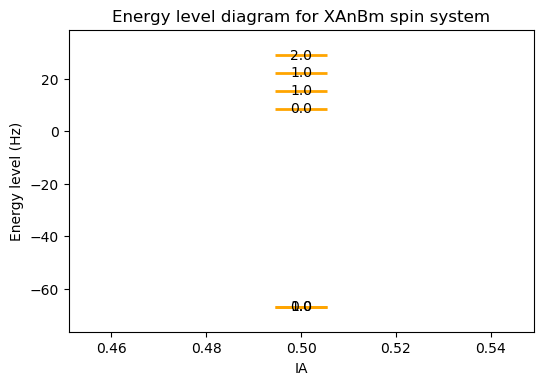

In [5]:
# We can create energy level diagram for the example spin system. 
XAnBm(0.5,0.5,1,1,1,89.1,0,13.68).energy_diagram() #XAnBm(S,IA,n,IB,m,JXA,JAB,JXB)

In [6]:
# We can check the observable transitions for the example spin system. 
XAnBm(0.5,0.5,1,1,1,89.1,0,13.68).observable_transitions() #XAnBm(S,IA,n,IB,m,JXA,JAB,JXB)

,ΔF,ΔFT,ΔE(Hz)
0,0.0-->1.0,0.0-->1.0,89.10
1,0.0-->1.0,1.0-->0.0,75.42
2,0.0-->1.0,1.0-->1.0,82.26
3,1.0-->1.0,0.0-->1.0,6.84
4,0.0-->1.0,1.0-->2.0,95.94
5,1.0-->1.0,1.0-->2.0,13.68


In [7]:
# We can also read the file that consists of data about observable transitions in the example spin system. 
df4 = pd.read_csv("XAnBm_table_of_energy_levels.tsv", index_col=None, header=0, sep='\t')
df4

,IA,S,F,IB,FT,E0 (JXA),E0 (Hz),E1 (Hz),ET (Hz)
0,0.5,0.5,0.0,0,0.0,-0.75,-66.825,0.00,-66.825
1,0.5,0.5,0.0,1,1.0,-0.75,-66.825,0.00,-66.825
2,0.5,0.5,1.0,0,1.0,0.25,22.275,0.00,22.275
3,0.5,0.5,1.0,1,0.0,0.25,22.275,-13.68,8.595
4,0.5,0.5,1.0,1,1.0,0.25,22.275,-6.84,15.435
5,0.5,0.5,1.0,1,2.0,0.25,22.275,6.84,29.115


In [14]:
# The results were checked and confirmed by the reference paper.
# The detailed data is in supporting information (https://pubs.acs.org/doi/10.1021/acs.jpclett.0c03532).
# The project is created by Seyma Alcicek.